# This notebook shows the implications of lifting an optimal transport plan

In [7]:
from utils.utils import *
from utils.Visualizations import *

### Trivial, 5 dimentional case

In [4]:
n_p = 5
n_q = 5
p = np.array([1,2,1,0,0])
q = np.array([0,0,1,2,1])
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

In [5]:
C = np.zeros([n_p,n_q],dtype=np.float64)
dist_f2 = lambda a,b : (a-b)**2
# Calculate the cost matrix, this is inefficient for large items.
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

In [6]:
T_standard = create_T(p, q, C, 'standard')
T_lifted = create_T(p, q, C, 'lifted')

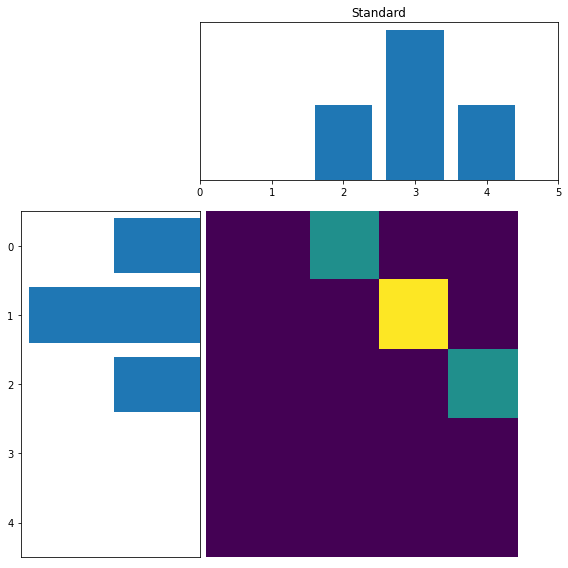

In [8]:
plot_transport_map_with_marginals(p,q,T_standard.transport_plan, 'Standard')

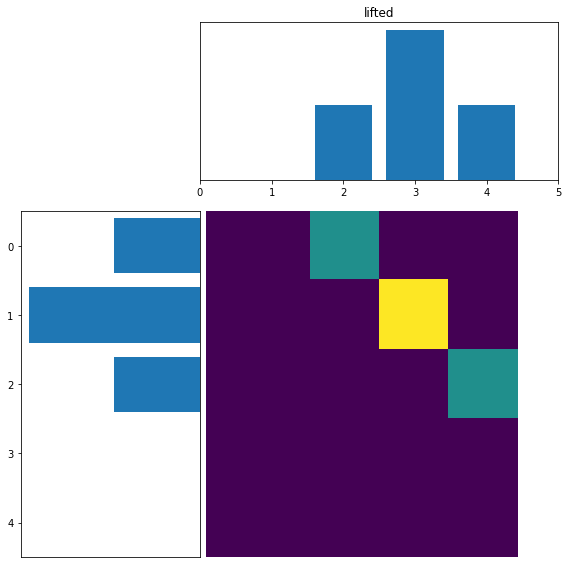

In [9]:
plot_transport_map_with_marginals(p,q,T_lifted.transport_plan, 'lifted')

## Positive Gaussians

In [10]:
n_p = 100
n_q = 100
p = make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.).flatten()
q = make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.).flatten()
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

In [11]:
C = np.zeros([n_p,n_q],dtype=np.float64)
dist_f2 = lambda a,b : (a-b)**2
# Calculate the cost matrix, this is inefficient for large items.
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

In [12]:
T_standard = create_T(p, q, C, 'standard')
T_lifted = create_T(p, q, C, 'lifted')

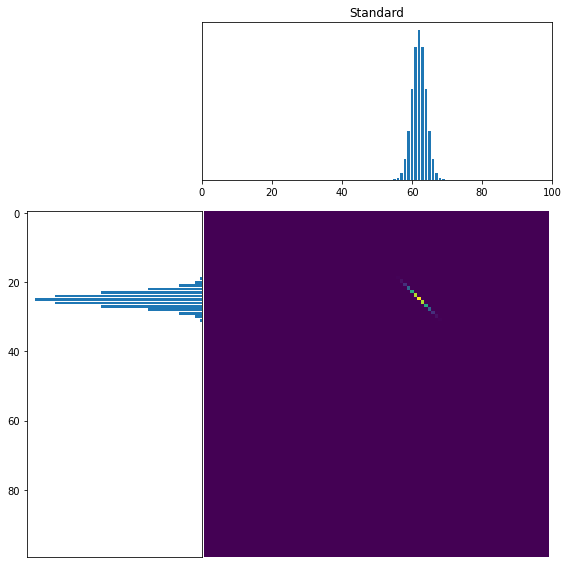

In [13]:
plot_transport_map_with_marginals(p,q,T_standard.transport_plan, 'Standard')

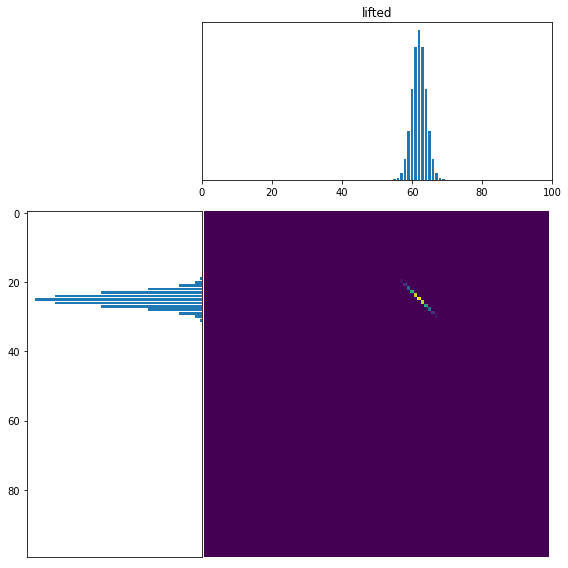

In [14]:
plot_transport_map_with_marginals(p,q,T_lifted.transport_plan, 'lifted')

## Signed Gaussians

In [15]:
n_p = 100
n_q = 100
p = (make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.) + make_1D_gauss(n_p, np.floor(2 * n_p / 4.), 2.) * (-0.5)).flatten()
q = (make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.) + make_1D_gauss(n_q, np.floor(7 * n_q / 8.), 2.) * (-0.5)).flatten()
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

In [16]:
C = np.zeros([n_p,n_q],dtype=np.float64)
dist_f2 = lambda a,b : (a-b)**2
# Calculate the cost matrix, this is inefficient for large items.
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

In [18]:
#T_standard = create_T(p, q, C, 'standard')
T_lifted = create_T(p, q, C, 'lifted')

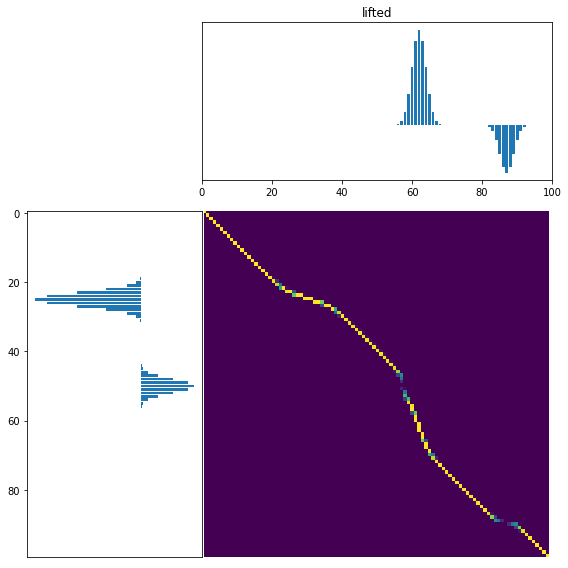

In [19]:
plot_transport_map_with_marginals(p,q,T_lifted.transport_plan, 'lifted')

In [22]:
diag = np.diag(T_lifted.transport_plan)
diag = np.diag(diag)
transport_without_diag = T_lifted.transport_plan - diag

In [32]:
def plot1D_mat(a, b, M, title=''):
    """ Plot matrix M  with the source and target 1D distribution

    Creates a subplot with the source distribution a on the left and
    target distribution b on the tot. The matrix M is shown in between.


    Parameters
    ----------
    a : np.array, shape (na,)
        Source distribution
    b : np.array, shape (nb,)
        Target distribution
    M : np.array, shape (na,nb)
        Matrix to plot
    title: string, optional (default='')
    """
    na, nb = M.shape

    gs = gridspec.GridSpec(3, 3)

    xa = np.arange(na)
    xb = np.arange(nb)

    ax1 = plt.subplot(gs[0, 1:])
    plt.bar(xb, b, label='Target distribution')
    plt.yticks(())
    plt.title(title)

    #because of barh syntax, a and xa should be in reverse order.
    ax2 = plt.subplot(gs[1:, 0])
    plt.barh(xa, a, label='Source distribution')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.xticks(())

    ax3 = plt.subplot(gs[1:, 1:], sharex=ax1, sharey=ax2)
    img = plt.imshow(M, interpolation='nearest')
    plt.axis('off')

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(img, cax=cax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.2)

In [31]:
def plot_transport_map_with_marginals(p, q, Transport_plan, title):
    """
    Plot the transport map
    :param q: target distribution
    :param p: source distribution
    :param Transport_plan: transport plan
    :param title: title of the plot
    :return: None, plot the transport map
    """
    plt.figure(figsize=(10, 10))
    plot1D_mat(p, q, Transport_plan, title)
    plt.show()

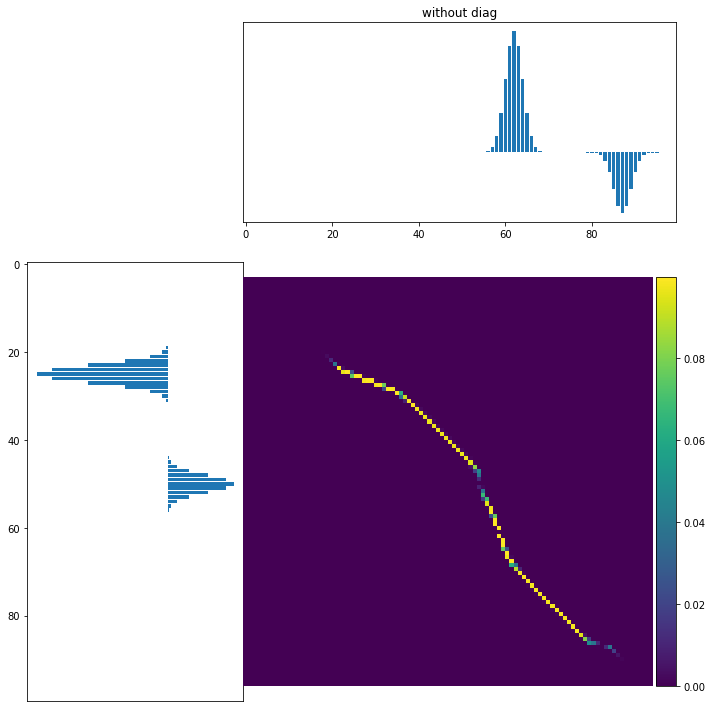

In [33]:
plot_transport_map_with_marginals(p,q,transport_without_diag, 'without diag')